# Predict Housing Prices In Boston Using Linear Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploring Data

In [37]:
from sklearn.datasets import load_boston
boston = load_boston()

In [38]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [75]:
boston['feature_names'] = ['Crime rate',
                           'Residential land zoned',
                           'Non-retail business acres',
                           'River variable',
                           'Nitric oxides', 
                           'Average number of rooms', 
                           'Owner-occupied units', 
                           'Distances to employment centres', 
                           'Accessibility to highways', 
                           'Property-tax', 
                           'Pupil-teacher ratio', 
                           'Blacks proportion', 
                           'Lower status']


In [76]:
boston['feature_names']

['Crime rate',
 'Residential land zoned',
 'Non-retail business acres',
 'River variable',
 'Nitric oxides',
 'Average number of rooms',
 'Owner-occupied units',
 'Distances to employment centres',
 'Accessibility to highways',
 'Property-tax',
 'Pupil-teacher ratio',
 'Blacks proportion',
 'Lower status']

In [77]:
boston_df = pd.DataFrame(boston.data,columns=boston['feature_names'])

In [78]:
boston_df.head()

,Crime rate,Residential land zoned,Non-retail business acres,River variable,Nitric oxides,Average number of rooms,Owner-occupied units,Distances to employment centres,Accessibility to highways,Property-tax,Pupil-teacher ratio,Blacks proportion,Lower status
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Data Visualization

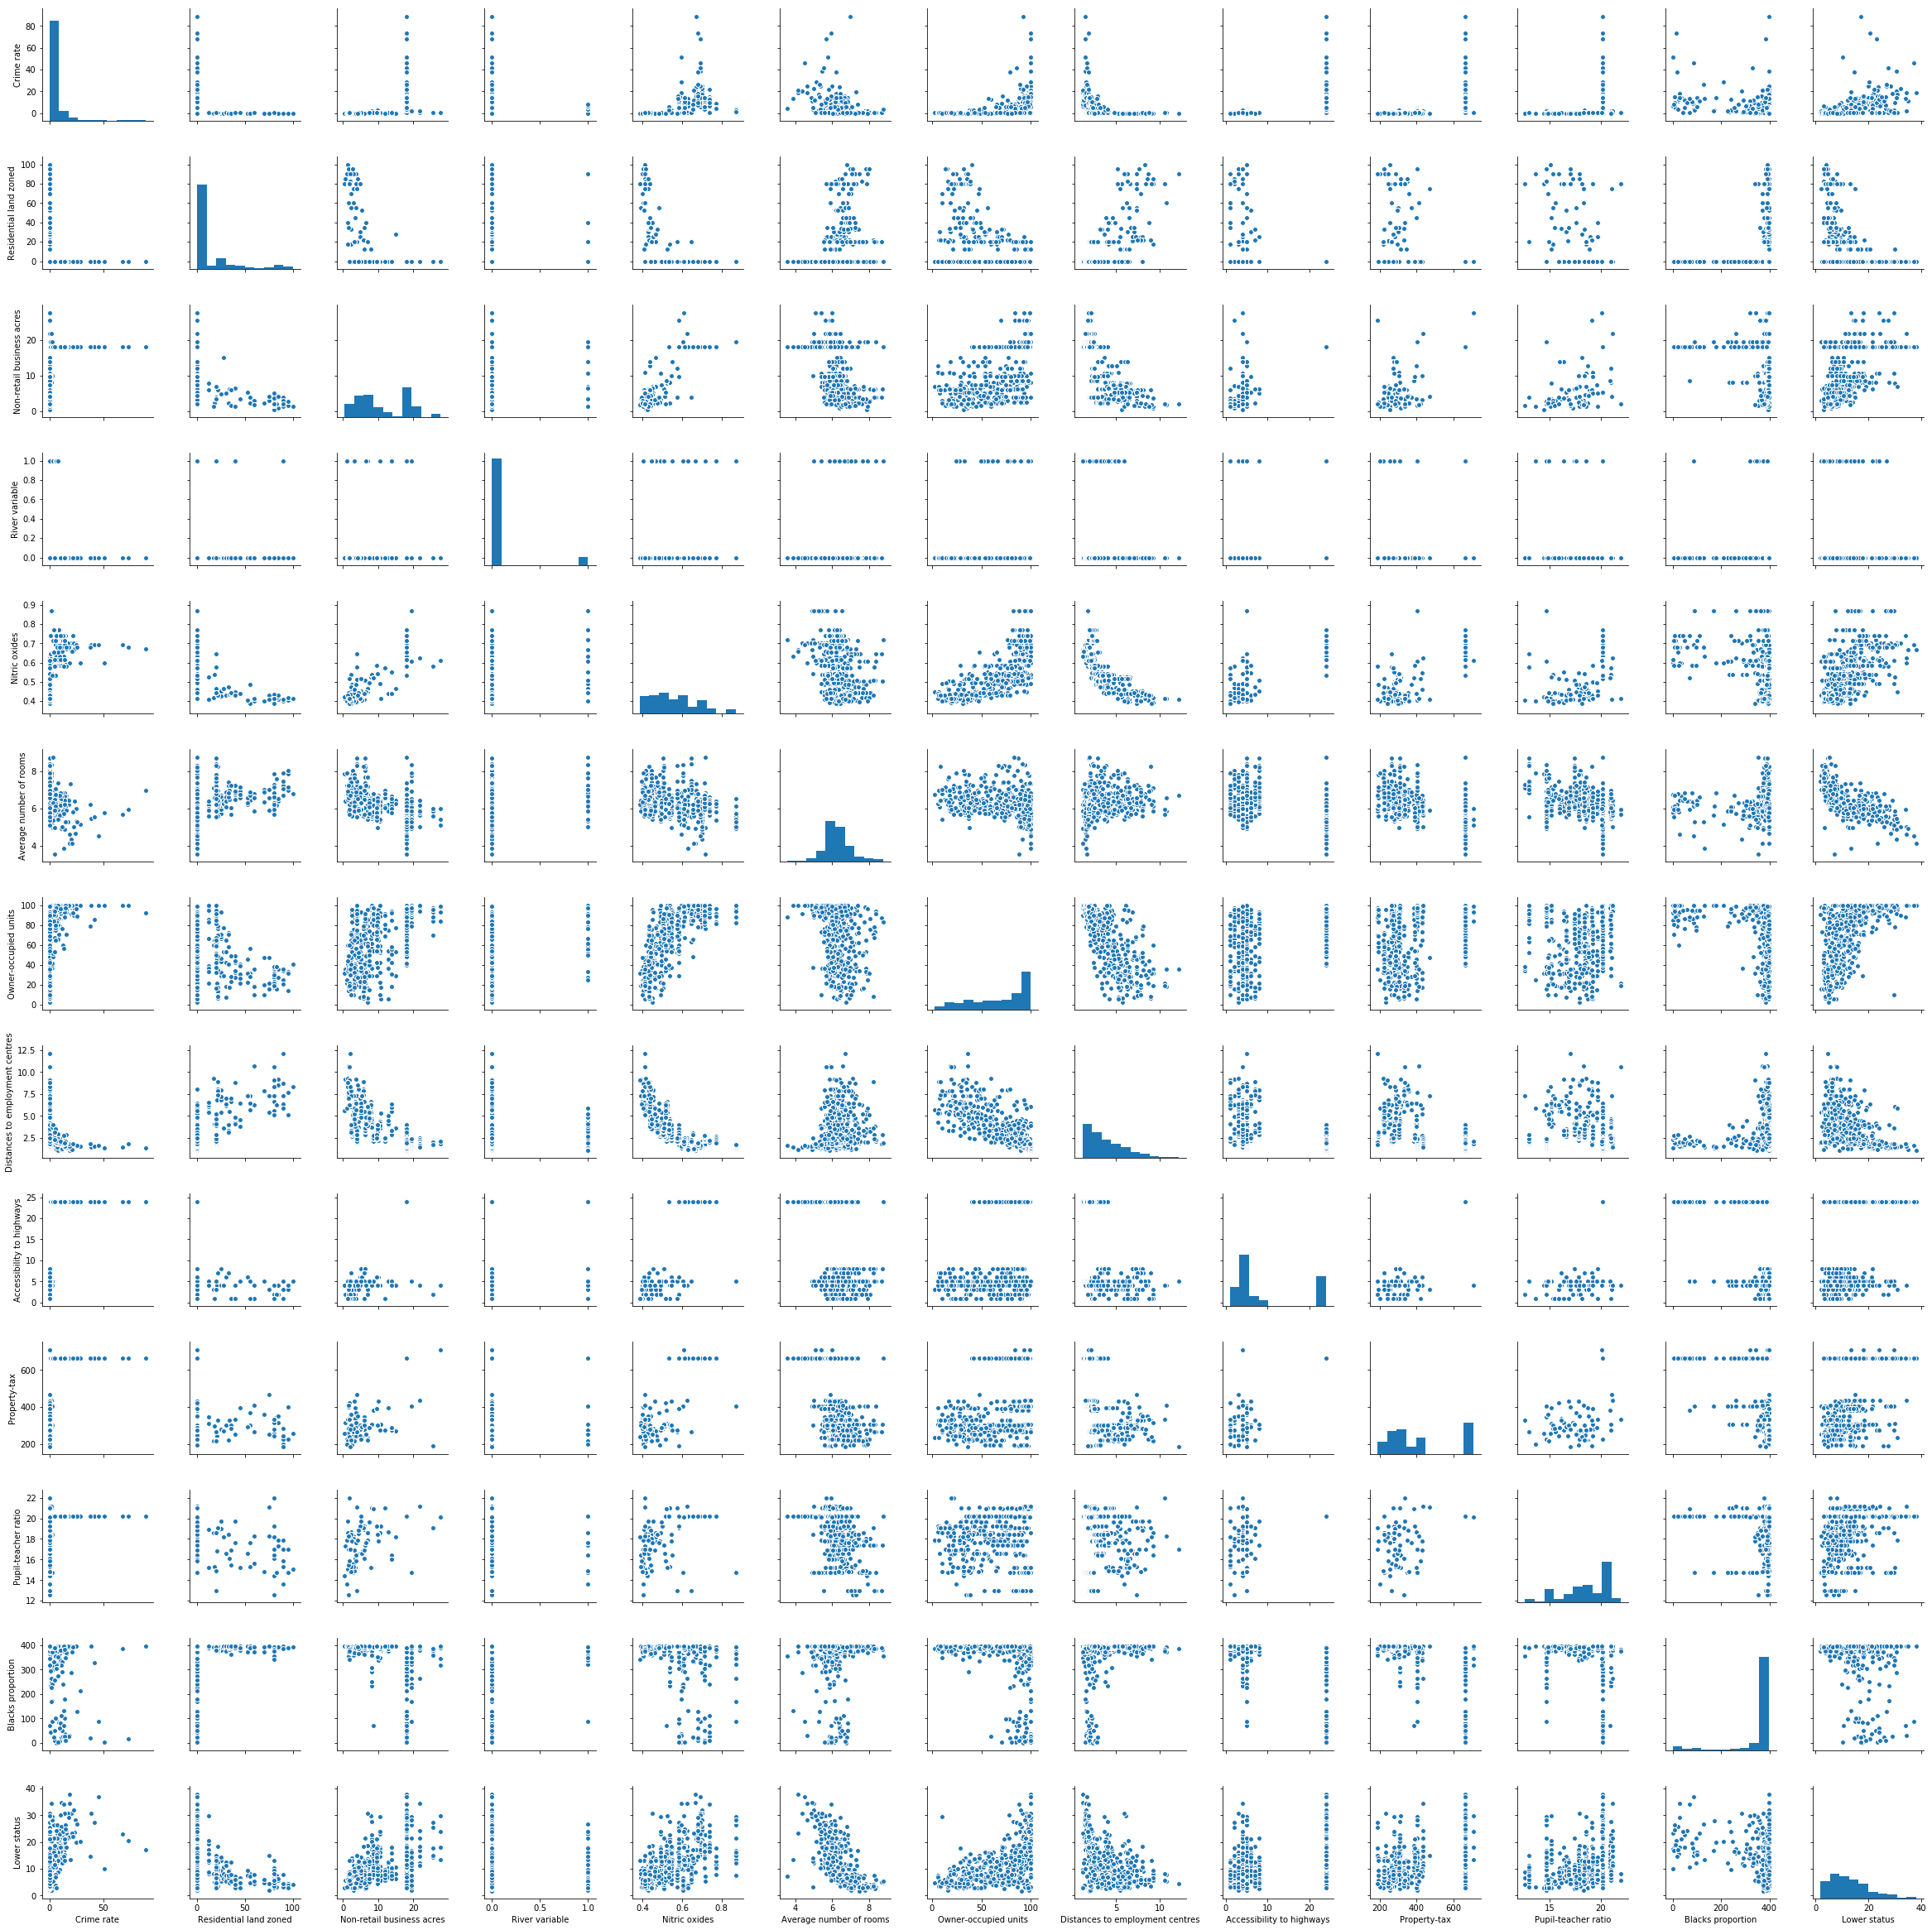

In [79]:
sns.pairplot(boston_df)

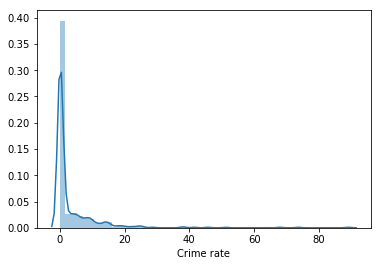

In [80]:
sns.distplot(boston_df['Crime rate'])

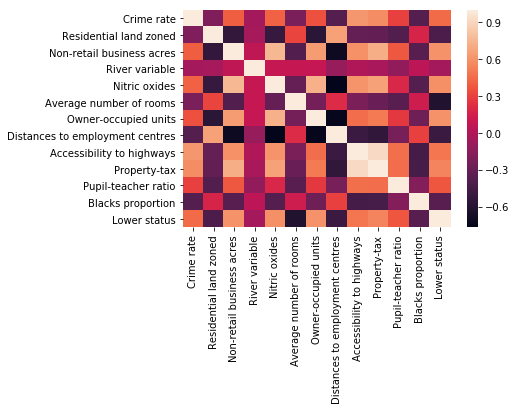

In [81]:
sns.heatmap(boston_df.corr())

## Training the model

In [82]:
X = boston_df
y = pd.DataFrame(boston.target,columns=['Price'])

In [83]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lm = LinearRegression()

In [88]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Evaluation

In [89]:
# print the intercept
print(lm.intercept_)

[ 41.28149654]


In [96]:
new_coef = lm.coef_*1000

In [97]:
coeff_df = pd.DataFrame(data = np.transpose(new_coef),index = X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Crime rate,-77.558371
Residential land zoned,42.031016
Non-retail business acres,91.152947
River variable,4133.049319
Nitric oxides,-19976.557465
Average number of rooms,2890.190425
Owner-occupied units,16.153326
Distances to employment centres,-1264.747452
Accessibility to highways,260.170760
Property-tax,-11.125199


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Crime rate** is associated with a **decrease of \$77.55 **.
- Holding all other features fixed, a 1 unit increase in **Nitric Oxidees** is associated with a **decrease of \$19976.55 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$2890.19 **.
- Holding all other features fixed, a 1 unit increase in **Lower status** is associated with a **decrease of \$643.48 **.

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [64]:
predictions = lm.predict(X_test)

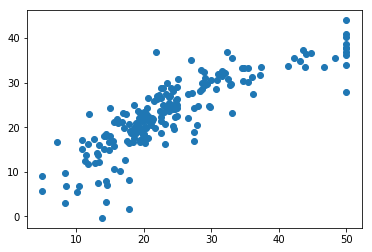

In [65]:
plt.scatter(y_test,predictions)

**Residual Histogram**

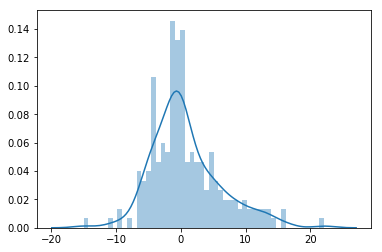

In [66]:
sns.distplot((y_test-predictions),bins=50);

In [67]:
from sklearn import metrics

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.90132419321
MSE: 29.4126438124
RMSE: 5.42334249447
